1. Когда используется критерий Стьюдента, а когда Z –критерий? Задачи 2,3 решать вручную

**Z-критерий**

Закон Z-критерия используется для проверки гипотезы о равенстве среднего значения генеральной совокупности с известным значением.
Данный критерий используется для проверки гипотезы о нормальности распределения данных в выборке с известным значением среднего значения.Это позволяет оценить точность среднего значения измерения в генеральной совокупности, а также понять, насколько данные в выборке представляют собой нормальное распределение.

**t-критерий**

t-критерий Стьюдента – общее название для класса методов статистической проверки гипотез (статистических критериев), основанных на распределении Стьюдента. Наиболее частые случаи применения t-критерия связаны с проверкой равенства средних значений в двух выборках, если данные для двух групп распределены нормально.
Закон Стьюдента позволяет оценить то, насколько средние значения двух групп отличаются.

2. Проведите тест гипотезы. Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм. Используя односторонний критерий с α=0,05, проверить эту гипотезу, если в выборке из n=100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 кв. мм.

**Решение:**
    
Для проверки гипотезы будем использовать критерий Стьюдента для выборочного среднего.

Формулируем нулевую и альтернативную гипотезы:

    μ=17 мм - cредний диаметр шариков равен 17 мм
    μ_1≠17 мм - cредний диаметр шариков не равен 17 мм
    α=0,05 - уровень значимости


    
Вычисляем статистику теста Z:   $Z = {(17.5 - 17)}/{(\sqrt(4)}/{\sqrt(100)}) = 2.5$

Ищем критическую область:   $Z_α/2 = Zcritical = ±1.96$

Для данного значения статистики в таблице уровня значимости $α=0,05$ соответствует критическое значение $Z = 1.645$.

Принимаем решение о приеме/отклонении нулевой гипотезы:  $2.5 > 1.645$ 

поэтому мы отклоняем нулевую гипотезу и принимаем альтернативную.

Вывод:
На основе полученных результатов мы можем сделать вывод, что средний диаметр шариков для подшипников, изготовленных автоматическим станком, не равен 17 мм.


In [1]:
# Проверка гипотезы
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Параметры для проверки гипотезы
mu = 17 # средний диаметр
d = 17.5 # значение среднего диаметра в выборке
sigma = 4 # стандартное отклонение
n = 100 # размер выборки
alpha = 0.05 # уровень значимости

In [3]:
# Расчет статистики теста
z = (d - mu) / (sigma/2 / np.sqrt(n))
print(z)

2.5


In [4]:
# Расчет критической области
zcritical = norm.ppf(1 - alpha / 2)
alfa = norm.ppf(1 - alpha)
print(f'{zcritical:.2f}')
print(f'{alfa:.3f}')

1.96
1.645


In [5]:
# Принятие решения о приеме/отклонении нулевой гипотезы
if z > alfa:
    print("Отклоняем нулевую гипотезу")
else:
    print("Принимаем нулевую гипотезу")

Отклоняем нулевую гипотезу


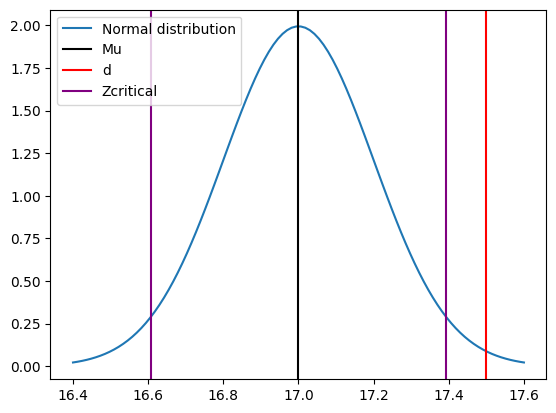

In [6]:
# Предельное значение среднего
s = np.sqrt(sigma/n)
# Расчет значений Z
x = np.linspace(mu - 3*s, mu + 3*s, 100)
y = 1/(np.sqrt(2*np.pi*sigma/n)) * np.exp(-(x - mu)**2 / (2*sigma/n))
# Построение графика
plt.plot(x, y, label='Normal distribution')
plt.axvline(x=mu, color='black', label='Mu')
plt.axvline(x=d, color='red', label='d')
plt.axvline(x=mu + zcritical*s, color='purple', label='Zcritical')
plt.axvline(x=mu - zcritical*s, color='purple')
plt.legend()
plt.show()

График показывает распределение выборочного среднего, если нулевая гипотеза верна. 
Если значение среднего диаметра в выборке попадает в критическую область, мы отклоняем нулевую гипотезу о равенстве среднего диаметра 17 мм.

    Черная линия - это математическое ожидание μ,
    Красная линия - это значение среднего диаметра в выборке d,
    Пурпурная линия - это критическая область Zcritical.

3. Проведите тест гипотезы. Продавец утверждает, что средний вес пачки печенья составляет 200 г.

    Из партии извлечена выборка из 10 пачек.

   Вес каждой пачки составляет: 202, 203, 199, 197, 195, 201, 200, 204, 194, 190.

    Известно, что их веса распределены нормально.

   Верно ли утверждение продавца, если учитывать, что доверительная вероятность равна 99%? (Провести двусторонний тест.)

   Соствим гипотезы

   $H_0$ :  $М = 200$
   
   $H_1$ :  $М ≠ 200$

In [12]:
weights = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])
n = 10

mean = weights.mean()
std = weights.std(ddof=1)

mean, std

(198.5, 4.453463071962462)

Поскольку мы проверяем гипотезу относительно математического ожидания нормально распределённой случайной величины с неизвестной дисперсией, будем использовать статистику:


In [13]:
# t- наблюдаемое
t = (mean-200)/(std/np.sqrt(n))
t

-1.0651074037450896

Доверительная вероятность $= 0.99$

Число степеней свободы = $n - 1 = 9$

по таблице Стьюдента находим критическое
$t_1= 3.25$
$t_2= -3.25$

$\\Omega_\alpha = (-\infty, -3.25) \cup (3.25, \infty).$

#### Ответ:

Значение $t$ не попадает в критическую область, таким образом, гипотезу $H_0$ не отвергаем

4. Есть ли статистически значимые различия в росте дочерей?

    Рост матерей 172, 177, 158, 170, 178,175, 164, 160, 169

    Рост взрослых дочерей: 173, 175, 162, 174, 175, 168, 155, 170, 160

    (Нужно решить с помощью функции)

In [10]:
import scipy.stats as stats

mothers = [172, 177, 158, 170, 178, 175, 164, 160, 169, 165]
daughters = [173, 175, 162, 174, 175, 168, 155, 170, 160, 163]

stats.ttest_rel(mothers, daughters)

TtestResult(statistic=0.6648478531431979, pvalue=0.5228168632983574, df=9)

#### Ответ:
Так как $p-value > \\alpha (0,05)$, $H_0$ не отвергаем.

Статистически заничмых различий нет.